In [211]:
# Imports pandas library for data manipulation and analysis using DataFrames.
import pandas as pd

# Imports NumPy library for numerical operations and array handling.
import numpy as np

# Imports Seaborn library for statistical data visualization.
import seaborn as sns

# Imports Matplotlib pyplot module for creating plots and charts.
import matplotlib.pyplot as plt

# Imports SMOTE technique to handle imbalanced datasets by oversampling the minority class.
from imblearn.over_sampling import SMOTE

# Imports utilities for splitting dataset and performing hyperparameter tuning.
from sklearn.model_selection import train_test_split, GridSearchCV

# Imports LabelEncoder to convert categorical features into numerical values.
from sklearn.preprocessing import LabelEncoder, label_binarize

# Imports Decision Tree classifier and function to visualize the decision tree.
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Imports performance evaluation metrics for classification models.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, recall_score, f1_score

In [212]:
# Loads the built-in "exercise" dataset from Seaborn into a pandas DataFrame.
df = sns.load_dataset("exercise")

# Displays the first five rows of the DataFrame to preview the dataset.
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [213]:
# Displays a concise summary of the DataFrame including column names, data types, and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [214]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [215]:
# Returns a tuple representing the number of rows and columns in the DataFrame.
df.shape

(90, 4)

In [216]:
# Checks for missing values in each column and returns the total count of null values per column.
df.isnull().sum()

diet     0
pulse    0
time     0
kind     0
dtype: int64

In [217]:
# Identifies duplicate rows in the DataFrame and returns the total number of duplicated records.
df.duplicated().sum()

np.int64(5)

Visualization

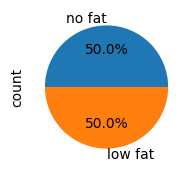

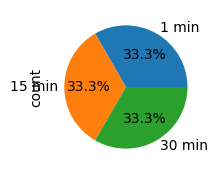

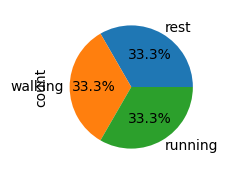

In [218]:
# Loops through all categorical columns in the DataFrame, plots each column's value distribution as a pie chart with percentages, and displays it.
for col in df.select_dtypes(include='category').columns:
    plt.figure(figsize=(3,2))                           # Sets the figure size for the pie chart.
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')  # Plots value counts as pie chart with percentage labels.
    plt.show()                                          # Displays the pie chart.


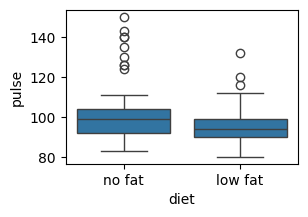

In [219]:
# Creates a boxplot to visualize the distribution of 'pulse' values for each 'diet' category.
plt.figure(figsize=(3,2))               # Sets the figure size for the plot.
sns.boxplot(data=df, x='diet', y='pulse')  # Plots a boxplot of 'pulse' grouped by 'diet' categories.
plt.show()                              # Displays the boxplot.


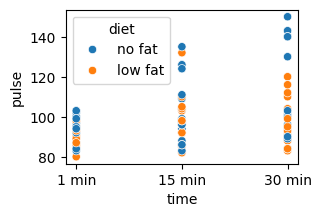

In [220]:
# Creates a scatter plot to visualize the relationship between 'time' and 'pulse', colored by 'diet' categories.
plt.figure(figsize=(3,2))                          # Sets the figure size for the plot.
sns.scatterplot(data=df, x='time', y='pulse', hue='diet')  # Plots a scatter plot with points colored by 'diet'.
plt.show()                                         # Displays the scatter plot.


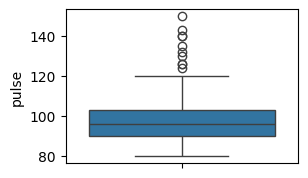

In [221]:
# Loops through all numeric columns in the DataFrame and creates a boxplot for each to visualize their distributions and detect outliers.
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(3,2))   # Sets the figure size for each boxplot.
    sns.boxplot(df[col])         # Plots a boxplot for the current numeric column.
    plt.show()                   # Displays the boxplot.

In [222]:
# Encodes all categorical columns in the DataFrame into numeric values using Label Encoding.
le = LabelEncoder()   # Creates a LabelEncoder object.

for col2 in df.select_dtypes(include='category').columns:
    df[col2] = le.fit_transform(df[col2])  # Converts each categorical column into numeric codes.

In [223]:
df.head()

,diet,pulse,time,kind
0,0,85,0,0
1,0,85,1,0
2,0,88,2,0
3,0,90,0,0
4,0,92,1,0


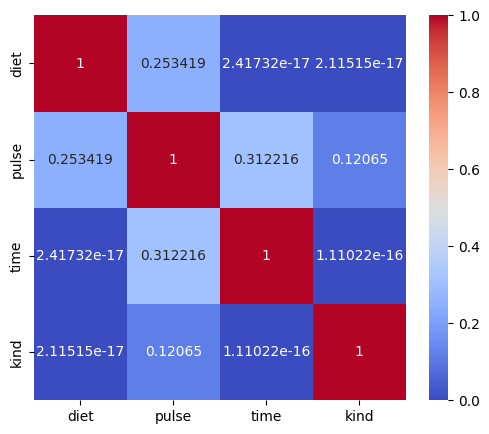

In [224]:
# Creates a heatmap to visualize the correlation matrix of all numeric columns in the DataFrame.
plt.figure(figsize=(6,5))                              # Sets the figure size for the heatmap.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='g')  # Plots the correlation matrix with annotations and color map.
plt.show()                                             # Displays the heatmap.

In [225]:
# Separates the features (independent variables) and target (dependent variable) for modeling.
x = df[['diet', 'pulse', 'time']]  # Selects 'diet', 'pulse', and 'time' as feature columns.
y = df[['kind']]                   # Selects 'kind' as the target column.

In [226]:
# Splits the dataset into training and testing sets.
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.1, random_state=42
)  # 90% data for training, 10% for testing; random_state ensures reproducibility.

In [227]:
xtrain.head()

,diet,pulse,time
44,0,95,2
81,1,103,0
35,0,104,2
56,1,100,2
86,1,130,2


In [228]:
ytrain.head()

,kind
44,2
81,1
35,2
56,2
86,1


In [229]:
dt = DecisionTreeClassifier(max_depth=4)

In [230]:
model = dt.fit(xtrain, ytrain)

In [231]:
model.score(xtrain, ytrain)

0.654320987654321

In [232]:
model.score(xtest, ytest)

0.6666666666666666

In [233]:
pred_y = model.predict(xtest)

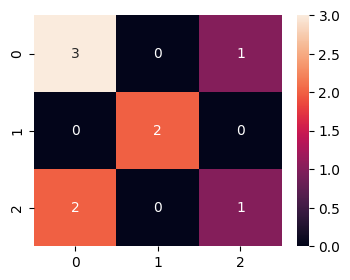

In [234]:
cm = confusion_matrix(ytest, pred_y)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True)
plt.show()

In [235]:
cl = classification_report(ytest, pred_y)
print(cl)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      1.00      1.00         2
           2       0.50      0.33      0.40         3

    accuracy                           0.67         9
   macro avg       0.70      0.69      0.69         9
weighted avg       0.66      0.67      0.65         9



In [236]:
ac = accuracy_score(ytest, pred_y)
ac

0.6666666666666666

In [237]:
f1 = f1_score(ytest, pred_y, average='macro')
f1

0.6888888888888888

In [238]:
re = recall_score(ytest, pred_y, average='macro')
re

0.6944444444444445

In [239]:
pred_proba = model.predict_proba(xtest)

In [240]:
ras = roc_auc_score(ytest, pred_proba, multi_class='ovr')
ras

0.7935185185185185

In [241]:
#here is a problem
#fpr, tpr, thresholds = roc_curve(ytest, pred_y)

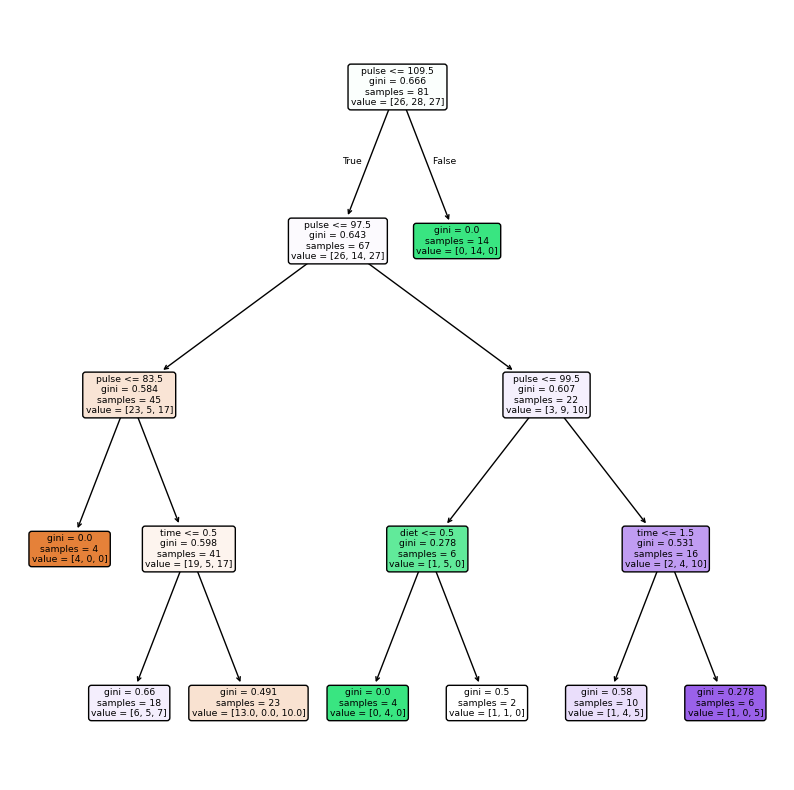

In [242]:
plt.figure(figsize=(10,10))
plot_tree(model, feature_names=x.columns, filled=True, rounded=True)
plt.show()